<a href="https://colab.research.google.com/github/EnterTheBeginning/SmartHomeEnergyForecasting/blob/master/Final_TimeSeries_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [38]:
from sklearn.metrics.pairwise import pairwise_distances
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.manifold import TSNE
from sklearn.metrics import normalized_mutual_info_score, adjusted_rand_score
from sklearn.metrics import mean_squared_error
import random
from scipy.spatial.distance import euclidean
import scipy.cluster.hierarchy
from sklearn.preprocessing import StandardScaler,MinMaxScaler

%matplotlib inline
from sklearn import cluster

from math import sqrt, log, floor
from fastdtw import fastdtw
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import mpl_toolkits.mplot3d.axes3d as p3
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.layers import  Conv1D, MaxPool1D, Dense, Activation, GlobalMaxPool1D
from keras.utils import np_utils
from keras.layers.recurrent import LSTM
from keras.layers.core import Dense, Activation, Dropout

sns.set(style='white')
random.seed(47)


Using TensorFlow backend.


In [2]:
!pip install seaborn --upgrade 

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [3]:
data = pd.read_excel('/content/gdrive/My Drive/Colab Notebooks/1.Data Analytics/~Code/Data/energy2.xlsx',header=None, delim_whitespace=True)
data =data.fillna(data.mean())
for column in range(2, 25):
    data[column] = (data[column] - data[column].mean()) / data[column].std()
data.shape

(52707, 25)

## Preprocessing


In [4]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,1.0,1.0,-1.560263e-15,7.215364e-16,1.049077e-15,5.059400e-15,-1.452022e-16,7.215364e-16,-1.117718e-15,1.399941e-16,...,-3.195479e-16,8.351957e-16,-6.368749e-17,-1.325691e-15,1.729629e-15,-6.329252e-16,-5.734594e-16,9.467734e-16,-2.050286e-16,8.872782e-16
1,1.0,2.0,-5.151625e-01,-6.123064e-01,-2.001415e-01,-7.895147e-01,-1.509702e-01,-6.123064e-01,7.578462e-01,-1.524233e-01,...,1.894004e+00,-1.495780e-01,-1.378934e-01,-8.815681e-02,-1.030948e+00,-1.170767e-01,-1.426141e-01,-3.762615e-01,-1.497086e-01,-2.014457e-01
2,1.0,3.0,-4.839902e-01,-6.121891e-01,-1.325939e-01,-7.939088e-01,-1.514003e-01,-6.121891e-01,-8.917401e-01,-1.433071e-01,...,2.055279e+00,-1.507737e-01,-1.381178e-01,-1.142114e-01,-1.032519e+00,-1.356235e-01,-1.438079e-01,-4.127309e-01,-1.499502e-01,-2.072303e-01
3,1.0,4.0,-1.560263e-15,7.215364e-16,1.049077e-15,5.059400e-15,-1.452022e-16,7.215364e-16,-1.117718e-15,1.399941e-16,...,-3.195479e-16,8.351957e-16,-6.368749e-17,-1.325691e-15,1.729629e-15,-6.329252e-16,-5.734594e-16,9.467734e-16,-2.050286e-16,8.872782e-16
4,1.0,5.0,-4.645514e-01,-6.122261e-01,-9.443203e-02,-7.929221e-01,-1.504633e-01,-6.122261e-01,1.892869e-01,-1.447716e-01,...,2.562188e+00,-1.538576e-01,-1.384339e-01,-1.003574e-01,-1.032142e+00,-1.307588e-01,-1.419714e-01,-3.967282e-01,-1.497696e-01,-2.055254e-01


The data is preprocessed to 10 minute cycles of 23 sensors readings. Thus, making it a multi dimentional clustering problem.

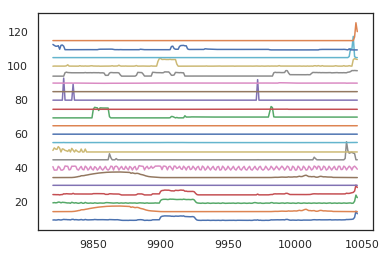

In [5]:
s1 = data[data[0]==47]
for i in range(2, 24):
    (s1[i]+5*i).plot(x=1)

*Normalized*

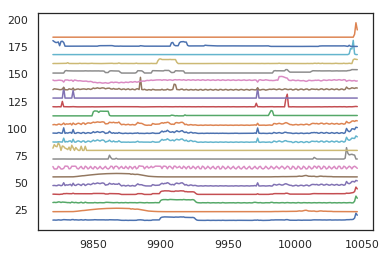

In [6]:
#Ploting the time series data
s1 = data[data[0]==47]
s1_norm = (s1 - s1.mean()) / s1.std()
for i in range(2, 24):
    (s1_norm[i]+8*i).plot(x=1)


##  clustering

K-Means


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


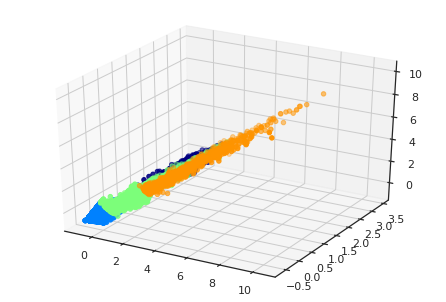

In [7]:
df = data.iloc[:,2:5]
kmeans = cluster.KMeans(n_clusters=4).fit(df)
kmeans.labels_
df['label'] = kmeans.labels_
fig = plt.figure()
ax = p3.Axes3D(fig)
for l in np.unique(kmeans.labels_):
    ax.scatter(df[df['label']==l].iloc[:,0],df[df['label']==l].iloc[:,1],df[df['label']==l].iloc[:,2],color=plt.cm.jet(np.float(l) / np.max(kmeans.labels_ + 1)))

In [0]:
#Clustering the Energy Consumption with its relation to one appliance

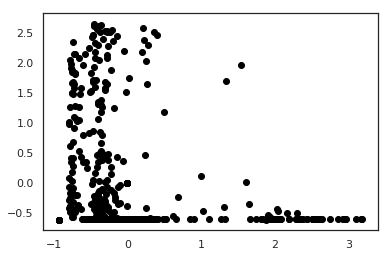

In [9]:
arg1=data[2].iloc[:1000]
arg2=data[7].iloc[:1000]
arg3=data[2]
plt.scatter(arg1,arg2,c='black')
X=np.array(list(zip(arg1,arg2)))

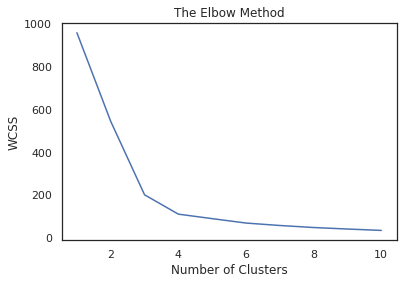

In [10]:
wcss=[]
from sklearn.cluster import KMeans
for i in range(1,11):
  kmeans=KMeans(n_clusters = i)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Clustering by each group. Think of this as a multi dimensional problem.   
Ideal approach for best performance in time-series data is using chunks of data.

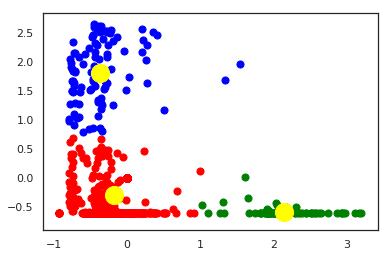

In [11]:

kmeans = KMeans(n_clusters =3)
kmeans = kmeans.fit(X)
y_kmeans = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
plt.scatter(X[y_kmeans == 0,0] , X[y_kmeans == 0,1], s = 50 , c='red',label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1,0] , X[y_kmeans == 1,1], s = 50 , c='blue',label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2,0] , X[y_kmeans == 2,1], s = 50 , c='green',label = 'Cluster 3')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1] , s = 330 , c ='yellow' , label ='Centroid ')

The clusters can be reverted to original format thus giving us valuable information

In [0]:
grouped = data.groupby(0)
series = [group.drop(labels=[0,1], axis=1) for name, group in grouped]
k = 6
chunk_length = 10
train_set = []
true_labels = []
for s1 in series:
    reversed_s1 = s1.iloc[::-1]
    for i in range(len(s1) // chunk_length):        
        chunk = reversed_s1[i*10:(i+1)*10]
        true_label = i
        train_set.append(chunk)
        true_labels.append(true_label)

In [0]:
# sampling
n = 100
indices = random.sample(list(range(len(train_set))), k=n) 
sample = [train_set[i] for i in indices]
sample_labels = [true_labels[i] for i in indices]

In [14]:
print(true_labels[0])
sample[0].shape

0


(10, 23)

### Distance computations

In [0]:
#  eucledean distance
euclidean_distances = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        euclidean_distances[i,j] = euclidean(sample[i].values.flatten(),
                                             sample[j].values.flatten())

In [0]:
# distances using RMSE
rmse_distances = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        rmse_distances[i,j] = sqrt(mean_squared_error(sample[i].values.flatten(),
                                                      sample[j].values.flatten()))

In [17]:
%%time
# distances using DTW
def dtw(x, y):
    dist, _ = fastdtw(x, y, dist=euclidean)
    return dist

dtw_distance = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        dtw_distance[i,j] = dtw(sample[i], sample[j])

CPU times: user 25.7 s, sys: 7.85 ms, total: 25.7 s
Wall time: 25.7 s


The longest common subsequence (or LCS) of groups A and B is the longest group of elements from A and B that are common between the two groups and in the same order in each group. For example, the sequences "1234" and "1224533324" have an LCS of "1234":



In [18]:
%%time
def lcs(a, b):  
    lengths = [[0 for j in range(len(b)+1)] for i in range(len(a)+1)]
    # row 0 and column 0 are initialized to 0 already
    for i, x in enumerate(a):
        for j, y in enumerate(b):
            if x == y:
                lengths[i+1][j+1] = lengths[i][j] + 1
            else:
                lengths[i+1][j+1] = max(lengths[i+1][j], lengths[i][j+1])
    x, y = len(a), len(b)
    result = lengths[x][y]
    return result

def discretise(x):
    return int(x * 10)

def multidim_lcs(a, b):
    a = a.applymap(discretise)
    b = b.applymap(discretise)
    rows, dims = a.shape
    lcss = [lcs(a[i+2], b[i+2]) for i in range(dims)]
    return 1 - sum(lcss) / (rows * dims)

lcs_distances = np.zeros((n,n))
for i in range(n):
    for j in range(n):
        lcs_distances[i,j] = multidim_lcs(sample[i], sample[j])
        
print(" ")

 
CPU times: user 2min 21s, sys: 34.6 ms, total: 2min 21s
Wall time: 2min 21s


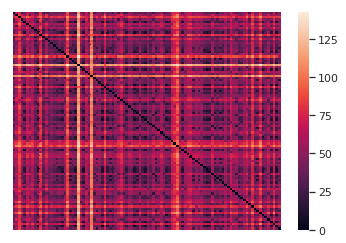

In [19]:
sns.heatmap(dtw_distance, xticklabels=False, yticklabels=False)

## Clustering algorithms

For each of these four metrics we have tried two clustering algorithms, K-means and Hierarchical agglomerative clustering.

In [20]:
print(dtw_distance)

[[ 0.         62.91465521 75.88876003 ... 73.90449147 30.1021342
  46.75045872]
 [62.91465521  0.         85.012787   ... 66.73806597 52.73509752
  56.18740371]
 [75.88876003 85.012787    0.         ... 83.95416953 81.8258297
  85.68809914]
 ...
 [73.90449147 66.73806597 83.95416953 ...  0.         70.64240455
  74.5528854 ]
 [30.1021342  52.73509752 81.8258297  ... 70.64240455  0.
  39.74747947]
 [46.75045872 56.18740371 85.68809914 ... 74.5528854  39.74747947
   0.        ]]


In [0]:
#lets use 6 clusters
k = 6
y_pred_km_euc = KMeans(n_clusters=k).fit_predict(euclidean_distances)
y_pred_km_dtw = KMeans(n_clusters=k).fit_predict(dtw_distance)
y_pred_km_rmse = KMeans(n_clusters=k).fit_predict(rmse_distances)
y_pred_km_lcs = KMeans(n_clusters=k).fit_predict(lcs_distances)

In [22]:
y_pred_hac_euc = AgglomerativeClustering(n_clusters=k)\
                 .fit_predict(euclidean_distances)
y_pred_hac_dtw = AgglomerativeClustering(n_clusters=k).fit_predict(dtw_distance)
y_pred_hac_rmse = AgglomerativeClustering(n_clusters=k).fit_predict(rmse_distances)
y_pred_hac_lcs = AgglomerativeClustering(n_clusters=k).fit_predict(lcs_distances)

/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')
/usr/local/lib/python3.6/dist-packages/scipy/cluster/hierarchy.py:482: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  return linkage(y, method='ward', metric='euclidean')


## Evaluation

In [0]:
# True label normalisation
log_base = max(true_labels)**(1 / k) + 0.05
normalised_true_labels = [floor(log(l+1, log_base)) for l in sample_labels]

In [24]:
print('Normalized Mutual Information')
print('K-means + Eucledean: ', normalized_mutual_info_score(normalised_true_labels,
                                                            y_pred_km_euc))
print('K-means + RMS:       ', normalized_mutual_info_score(normalised_true_labels,
                                                            y_pred_km_rmse))
print('K-means + DTW:       ', normalized_mutual_info_score(normalised_true_labels,
                                                            y_pred_km_dtw))
print('K-means + LCSS:      ', normalized_mutual_info_score(normalised_true_labels,
                                                            y_pred_km_lcs))
print('HAC + Eucledean:     ', normalized_mutual_info_score(normalised_true_labels,
                                                            y_pred_hac_euc))
print('HAC + RMS:           ', normalized_mutual_info_score(normalised_true_labels,
                                                            y_pred_hac_rmse))
print('HAC + DTW:           ', normalized_mutual_info_score(normalised_true_labels,
                                                            y_pred_hac_dtw))
print('HAC + LCSS:          ', normalized_mutual_info_score(normalised_true_labels,
                                                            y_pred_hac_lcs))

Normalized Mutual Information
K-means + Eucledean:  0.07034852406140019
K-means + RMS:        0.07034852406140017
K-means + DTW:        0.06765727787999054
K-means + LCSS:       0.10311471642203968
HAC + Eucledean:      0.056965145530660496
HAC + RMS:            0.056965145530660496
HAC + DTW:            0.0715188899739921
HAC + LCSS:           0.0890625237768097


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:844: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


In [25]:
print('Adjusted Rand Index')
print('K-means + Eucledean:  ', adjusted_rand_score(normalised_true_labels,
                                                    y_pred_km_euc))
print('K-means + RMS:       ', adjusted_rand_score(normalised_true_labels,
                                                   y_pred_km_rmse))
print('K-means + DTW:       ', adjusted_rand_score(normalised_true_labels,
                                                   y_pred_km_dtw))
print('K-means + LCSS:       ', adjusted_rand_score(normalised_true_labels,
                                                    y_pred_km_lcs))
print('HAC + Eucledean:     ', adjusted_rand_score(normalised_true_labels,
                                                   y_pred_hac_euc))
print('HAC + RMS:           ', adjusted_rand_score(normalised_true_labels,
                                                   y_pred_hac_rmse))
print('HAC + DTW:           ', adjusted_rand_score(normalised_true_labels,
                                                   y_pred_hac_dtw))
print('HAC + LCSS:           ', adjusted_rand_score(normalised_true_labels,
                                                    y_pred_hac_lcs))

Adjusted Rand Index
K-means + Eucledean:   -0.01778587517115153
K-means + RMS:        -0.01778587517115153
K-means + DTW:        0.003948297501713486
K-means + LCSS:        -0.001432607397685202
HAC + Eucledean:      -0.013578927588001175
HAC + RMS:            -0.013578927588001175
HAC + DTW:            -0.02302746420669214
HAC + LCSS:            -0.021064968029098678


## Cluster visualisation

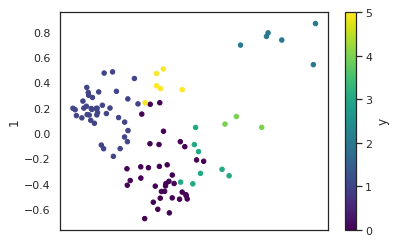

In [26]:
pca = PCA(n_components=2)
emb = pd.DataFrame(pca.fit_transform(lcs_distances))
emb['y'] = y_pred_hac_lcs
emb['gt'] = normalised_true_labels
emb.plot(kind='scatter', x=0, y=1, c='y', cmap='viridis')

In [0]:
# computeting features for a single chunk and sensor
def extract_featrues(chunk, s):
    column = chunk[s]
    slope = (column.iloc[-1]-column.iloc[0])/10
    return (column.std(), column.mean(), slope)

def compute_features_for_all_chunks(s):
    stds = []
    means = []
    slopes = []

    for chunk in sample:
        std, mean, slope = extract_featrues(chunk, s)
        stds.append(std)
        means.append(mean)
        slopes.append(slope)
    return pd.DataFrame({'std': stds, 'mean': means, 'slope': slopes,
                         'true_label': normalised_true_labels,
                         'cluster': y_pred_hac_lcs})

scatter plots for every sensor

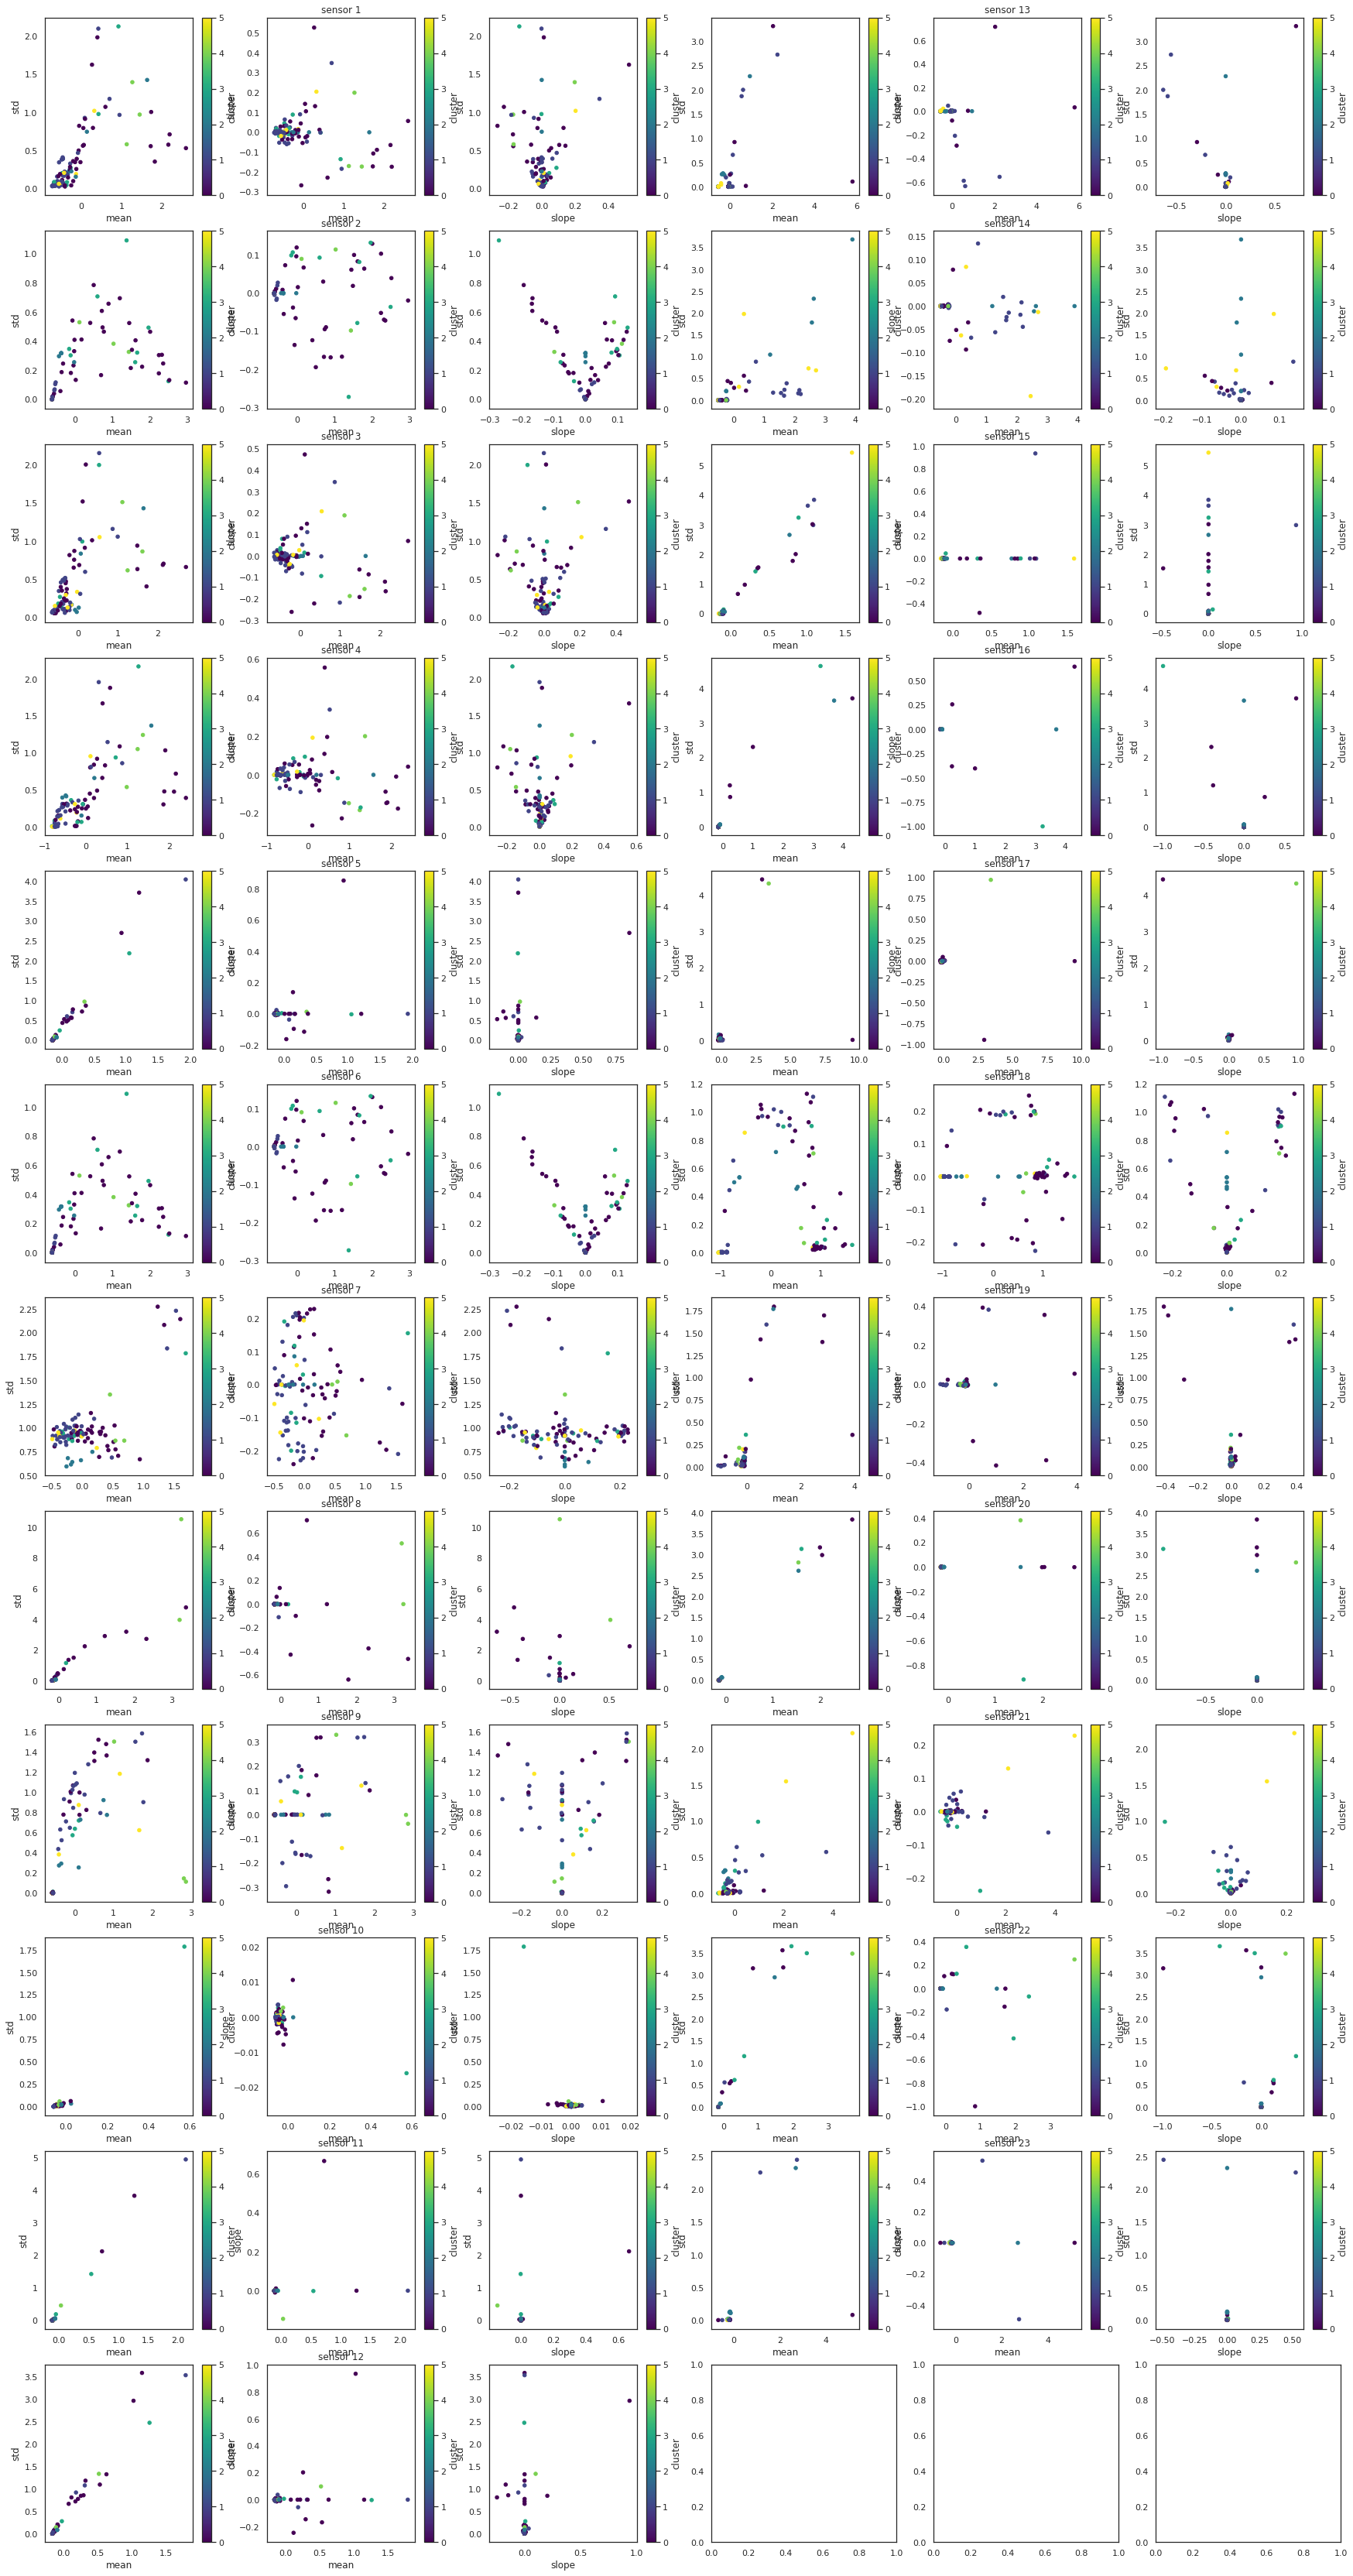

In [28]:
sensor_max = 24
sensor_min = 2

f, axis = plt.subplots(12, 6, figsize=(30,60))
for s in range(sensor_min, sensor_max+1):
    features = compute_features_for_all_chunks(s)
    row = (s-sensor_min)%12
    col = (s-sensor_min)//12
    features.plot(kind='scatter', x='mean', y='std', c='cluster',
                  cmap='viridis', ax=axis[row][col*3])
    features.plot(kind='scatter', x='mean', y='slope', c='cluster',
                  cmap='viridis', ax=axis[row][col*3+1])
    features.plot(kind='scatter', x='slope', y='std', c='cluster',
                  cmap='viridis', ax=axis[row][col*3+2])
    axis[row][col*3+1].set_title('sensor ' + str(s-sensor_min+1))

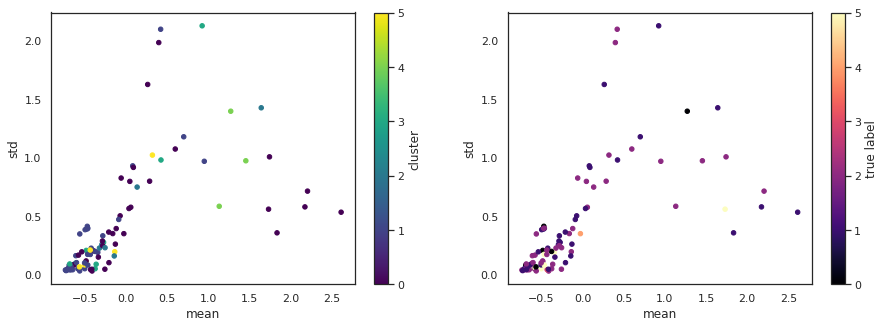

In [29]:
# sensor 22
# mean x std
f, axis = plt.subplots(1, 2, figsize=(15,5))
features = compute_features_for_all_chunks(2)
features.plot(kind='scatter', x='mean', y='std', c='cluster',
              cmap='viridis', ax=axis[0])
features['true label'] = normalised_true_labels
features.plot(kind='scatter', x='mean', y='std', c='true label',
              cmap='magma', ax=axis[1])

/usr/local/lib/python3.6/dist-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)


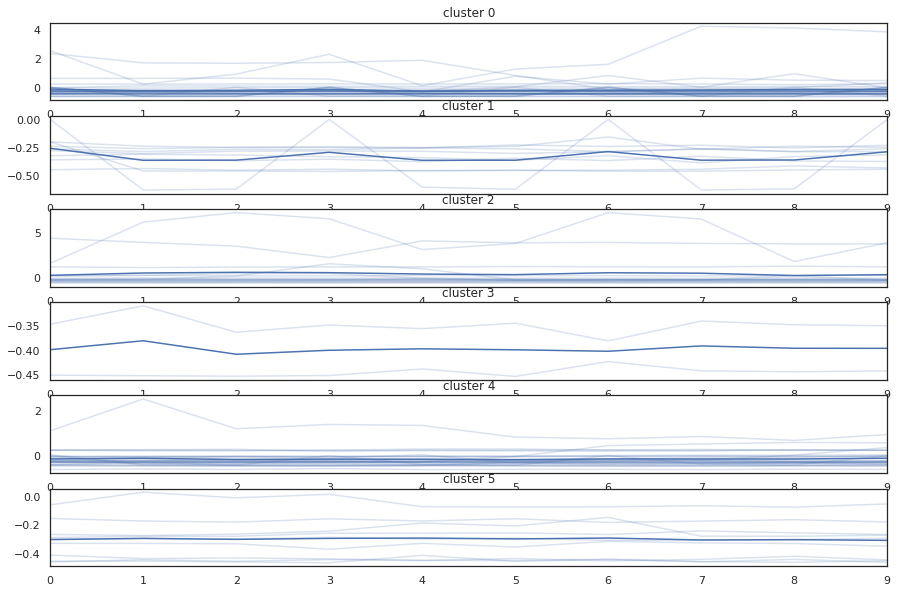

In [30]:
num_cluster = len(set(y_pred_hac_lcs))
sensor = 22

f, axis = plt.subplots(num_cluster, 1, figsize=(15, 10))
for c in range(num_cluster):
    index = y_pred_hac_dtw == c
    cluster_chunks = pd.DataFrame([chunk[sensor].reset_index(drop=True) 
                                   for chunk, flag in zip(sample, index)
                                   if flag]).as_matrix()
    sns.tsplot(data=cluster_chunks, err_style='unit_traces', ax=axis[c])
    axis[c].set_title('cluster ' + str(c))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


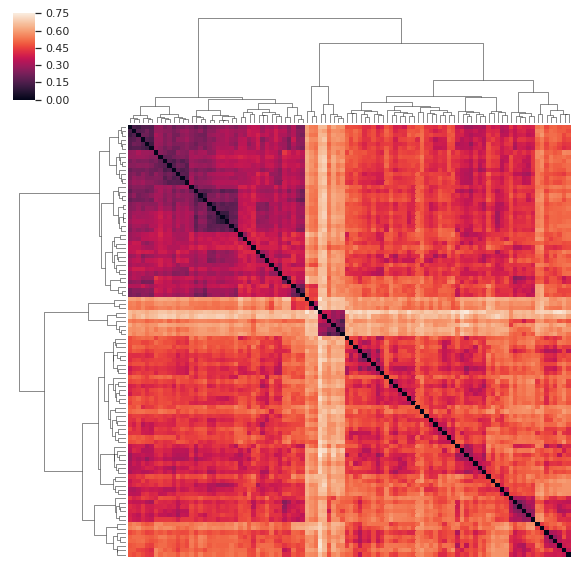

In [31]:
links = scipy.cluster.hierarchy.linkage(lcs_distances, method='ward')
sns.clustermap(lcs_distances, xticklabels=False, yticklabels=False,
               method='ward', col_linkage=links, row_linkage=links)


As seen above we can divide the data into three groups 

#Original Model Performance ( without Clustering)

In [0]:
#24 hour energy prediction with 10m data
hour24 = int(df.shape[0] / 366)
split = 365*hour24

X = data.iloc[:split,4:22].values
y = data.iloc[:split,2:3].values
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(X)
test_set_scaled = sc.fit_transform(y)
X_train = []
y_train = []
for i in range(24,480):
    X_train.append(training_set_scaled[i-24:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(24,120):
    X_test.append(test_set_scaled[i-24:i,0])
    y_test.append(test_set_scaled[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [99]:
model = Sequential()
layers = [1, 50,100, 1]
model.add(LSTM(layers[1],input_shape=(None, layers[0]),return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(layers[2],return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(layers[3]))
model.add(Activation("linear"))
model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
model.fit(X_train, y_train,batch_size=16, nb_epoch=2, validation_split=0.05)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 433 samples, validate on 23 samples
Epoch 1/2
433/433 [==============================] - 9s 21ms/step - loss: 0.0020 - acc: 0.0162 - val_loss: 8.6580e-04 - val_acc: 0.0000e+00
Epoch 2/2
433/433 [==============================] - 3s 6ms/step - loss: 0.0015 - acc: 0.0162 - val_loss: 9.1696e-04 - val_acc: 0.0000e+00


In [96]:
prediction = model.predict(X_test)
score = model.evaluate(X_test,y_test,verbose =0)
print('Test Loss:', score[0])
print('Test accuracy:' , score[1])


Test Loss: 0.010317130945622921
Test accuracy: 0.0


###Graph

Text(0.5, 0, '')

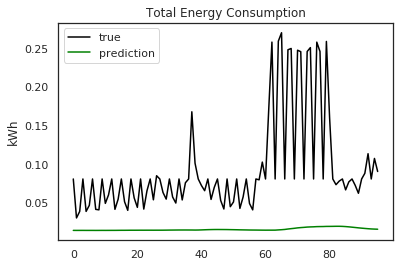

In [102]:
plt.figure(1)
plt.plot(y_test,label='true',color = 'black')
plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper left')
plt.title('Total Energy Consumption')
plt.ylabel('kWh') 
plt.xlabel('')

#Three Models with Adding Clusters detection:

In [0]:
grouped = data.groupby(0)
grouped
series = [group.drop(labels=[0,1,2], axis=1) for name, group in grouped]
k = 6
chunk_length = 10
train_set = []
true_labels = []
for s1 in series:
    reversed_s1 = s1.iloc[::-1]
    for i in range(len(s1) // chunk_length):        
        chunk = reversed_s1[i*10:(i+1)*10]
        true_label = i
        train_set.append(chunk)
        true_labels.append(true_label)

In [0]:
# sampling
n = 100
indices = random.sample(list(range(len(train_set))), k=n) 
sample = [train_set[i] for i in indices]
sample_labels = [true_labels[i] for i in indices]


In [0]:
hour24 = int(df.shape[0] / 366)
split = 145*hour24

X = data.iloc[:split,3:22].values
y = data.iloc[:split,2:3].values
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(X)
test_set_scaled = sc.fit_transform(y)
X_train = []
y_train = []
for i in range(24,480):
    X_train.append(training_set_scaled[i-24:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(24,120):
    X_test.append(test_set_scaled[i-24:i,0])
    y_test.append(test_set_scaled[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


##Model 1:

In [59]:
model1 = Sequential()
layers = [1, 50,100, 1]
model1.add(LSTM(layers[1],input_shape=(None, layers[0]),return_sequences=True))
model1.add(Dropout(0.2))
model1.add(LSTM(layers[2],return_sequences=False))
model1.add(Dropout(0.2))
model1.add(Dense(layers[3]))
model1.add(Activation("linear"))
model1.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
model1.fit(X_train, y_train,batch_size=16, nb_epoch=2, validation_split=0.05)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 433 samples, validate on 23 samples
Epoch 1/2
433/433 [==============================] - 6s 13ms/step - loss: 0.0171 - acc: 0.0000e+00 - val_loss: 0.0069 - val_acc: 0.0000e+00
Epoch 2/2
433/433 [==============================] - 3s 6ms/step - loss: 0.0149 - acc: 0.0000e+00 - val_loss: 0.0059 - val_acc: 0.0000e+00


In [60]:
prediction1 = model1.predict(X_test)
score = model1.evaluate(X_test,y_test,verbose =0)
print('Test Loss:', score[0])
print('Test accuracy:' , score[1])


Test Loss: 0.00407716827855135
Test accuracy: 0.0


###Graph

Text(0.5, 0, '')

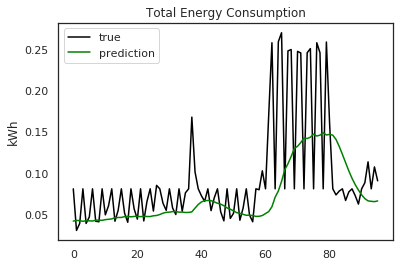

In [61]:
plt.figure(1)
plt.plot(y_test,label='true',color = 'black')
plt.plot(prediction,label='prediction',color = 'green')
plt.legend(loc='upper left')
plt.title('Total Energy Consumption')
plt.ylabel('kWh') 
plt.xlabel('')

##Model 2:

In [0]:
hour24 = int(df.shape[0] / 366)
split = 166*hour24

X = data.iloc[:split,3:22].values
y = data.iloc[:split,2:3].values
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(X)
test_set_scaled = sc.fit_transform(y)
X_train = []
y_train = []
for i in range(24,480):
    X_train.append(training_set_scaled[i-24:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(24,120):
    X_test.append(test_set_scaled[i-24:i,0])
    y_test.append(test_set_scaled[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [63]:
model2 = Sequential()
layers = [1, 50,100, 1]
model2.add(LSTM(layers[1],input_shape=(None, layers[0]),return_sequences=True))
model2.add(Dropout(0.2))
model2.add(LSTM(layers[2],return_sequences=False))
model2.add(Dropout(0.2))
model2.add(Dense(layers[3]))
model2.add(Activation("linear"))
model2.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
model2.fit(X_train, y_train,batch_size=16, nb_epoch=2, validation_split=0.05)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 433 samples, validate on 23 samples
Epoch 1/2
433/433 [==============================] - 6s 14ms/step - loss: 0.0166 - acc: 0.0000e+00 - val_loss: 0.0326 - val_acc: 0.0000e+00
Epoch 2/2
433/433 [==============================] - 3s 6ms/step - loss: 0.0151 - acc: 0.0000e+00 - val_loss: 0.0069 - val_acc: 0.0000e+00


In [64]:
prediction1 = model2.predict(X_test)
score = model2.evaluate(X_test,y_test,verbose =0)
print('Test Loss:', score[0])
print('Test accuracy:' , score[1])


Test Loss: 0.005681984980280201
Test accuracy: 0.0


###Graph

Text(0.5, 0, '')

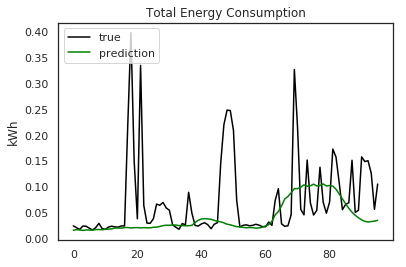

In [73]:
plt.figure(1)
plt.plot(y_test,label='true',color = 'black')
plt.plot(prediction1,label='prediction',color = 'green')
plt.legend(loc='upper left')
plt.title('Total Energy Consumption')
plt.ylabel('kWh') 
plt.xlabel('')

##Model 3:

In [0]:
hour24 = int(df.shape[0] / 366)
split = 255*hour24

X = data.iloc[split:,3:22].values
y = data.iloc[split:,2:3].values
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(X)
test_set_scaled = sc.fit_transform(y)
X_train = []
y_train = []
for i in range(24,480):
    X_train.append(training_set_scaled[i-24:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

X_test = []
y_test = []
for i in range(24,120):
    X_test.append(test_set_scaled[i-24:i,0])
    y_test.append(test_set_scaled[i,0])

X_test, y_test = np.array(X_test), np.array(y_test)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))


In [70]:
model3 = Sequential()
layers = [1, 50,100, 1]
model3.add(LSTM(layers[1],input_shape=(None, layers[0]),return_sequences=True))
model3.add(Dropout(0.2))
model3.add(LSTM(layers[2],return_sequences=False))
model3.add(Dropout(0.2))
model3.add(Dense(layers[3]))
model3.add(Activation("linear"))
model3.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
model3.fit(X_train, y_train,batch_size=16, nb_epoch=2, validation_split=0.05)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  # Remove the CWD from sys.path while we load stuff.


Train on 433 samples, validate on 23 samples
Epoch 1/2
433/433 [==============================] - 7s 15ms/step - loss: 0.0337 - acc: 0.0000e+00 - val_loss: 2.5960e-04 - val_acc: 0.0000e+00
Epoch 2/2
433/433 [==============================] - 3s 6ms/step - loss: 0.0143 - acc: 0.0000e+00 - val_loss: 1.3474e-04 - val_acc: 0.0000e+00


In [71]:
prediction3 = model3.predict(X_test)
score = model3.evaluate(X_test,y_test,verbose =0)
print('Test Loss:', score[0])
print('Test accuracy:' , score[1])


Test Loss: 0.007392617873847485
Test accuracy: 0.0


###Graph

Text(0.5, 0, '')

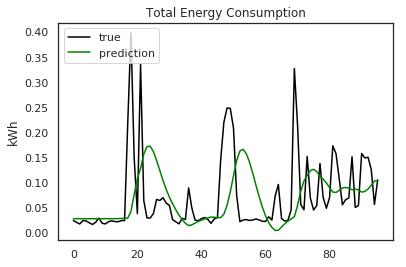

In [74]:
plt.figure(1)
plt.plot(y_test,label='true',color = 'black')
plt.plot(prediction3,label='prediction',color = 'green')
plt.legend(loc='upper left')
plt.title('Total Energy Consumption')
plt.ylabel('kWh') 
plt.xlabel('')